# Big Data (UNT) -  2024

## Trabajo Práctico 2 

### Fecha de entrega:
Jueves 26 de septiembre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado **“Entrega final del tp”**. 
- Asegurense de haber creado una carpeta llamada TP2. Deben entregar un reporte (pdf) y el código (jupyter notebook). Ambos deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- en el canal de Slack **#tp-entregas**.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el mensaje en el canal de Slack **#tp-entregas** hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el mensaje en el canal **#tp-entregas** y me tageen (@marianr2).
    - No hagan nuevos <i>push</i> después de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [25]:
#Importo la biblioteca que necesitaré para el desarrollo de este punto
import pandas as pd
df = pd.read_excel('Base Airbnb NY.xlsx')
print(df.head())

     id                                              name host_id  \
0  2539                Clean & quiet apt home by the park    2787   
1  2595                             Skylit Midtown Castle    2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !    4632   
3  3831                   Cozy Entire Floor of Brownstone    4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park    7192   

     host_name neighbourhood_group neighbourhood latitude longitude  \
0         John            Brooklyn    Kensington  4064749  -7397237   
1     Jennifer           Manhattan       Midtown  4075362  -7398377   
2    Elisabeth           Manhattan        Harlem  4080902   -739419   
3  LisaRoxanne            Brooklyn  Clinton Hill  4068514  -7395976   
4        Laura           Manhattan   East Harlem  4079851  -7394399   

         room_type  price minimum_nights number_of_reviews  \
0     Private room  149.0              1                 9   
1  Entire home/apt  225.0         

In [23]:
#Especifico que me elimine filas duplicadas en la columna id
df = df.drop_duplicates(subset='id')
#Elimino las observaciones que tienen NaN en al menos una de sus columnas
df = df.dropna()
#Elimino las columnas que tienen información irrelevante
df = df.drop(columns=['Unnamed: 16', 'Unnamed: 17'], errors='ignore')
print(df.columns)
print(df.head())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


TypeError: 'value' must be an instance of str or bytes, not a int

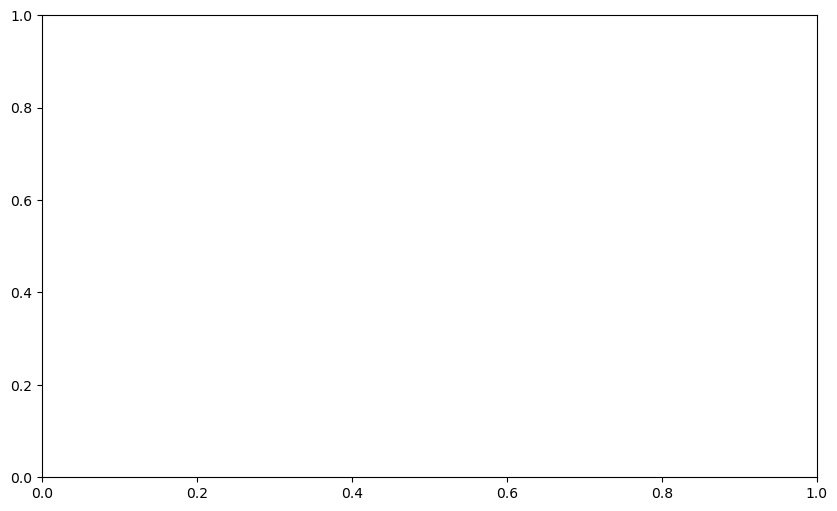

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tus datos
df = pd.read_excel('Base Airbnb NY.xlsx')

# Crear un histograma de la columna 'precio'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Histograma de Precios de Airbnb')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [45]:
df['price'] = pd.to_numeric(df['price'].str.replace('.', ''), errors='coerce')

AttributeError: Can only use .str accessor with string values!

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [ ]:
# Resolver acá


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
# Resolver acá


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [1]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [1]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
